# **HEART DISEASE PREDICTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/projects/Heart Disease Risk Assessment Project/heart.csv")
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
651,61,M,ASY,140,207,0,LVH,138,Y,1.9,Up,1
433,46,M,ASY,110,236,0,Normal,125,Y,2.0,Flat,1
409,53,M,NAP,160,0,1,LVH,122,Y,0.0,Flat,1
397,58,M,ASY,170,0,1,ST,105,Y,0.0,Flat,1
826,51,M,NAP,125,245,1,LVH,166,N,2.4,Flat,0


In [4]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
x = df.drop(columns='HeartDisease')
y = df.iloc[:,-1]

<Axes: xlabel='Sex', ylabel='count'>

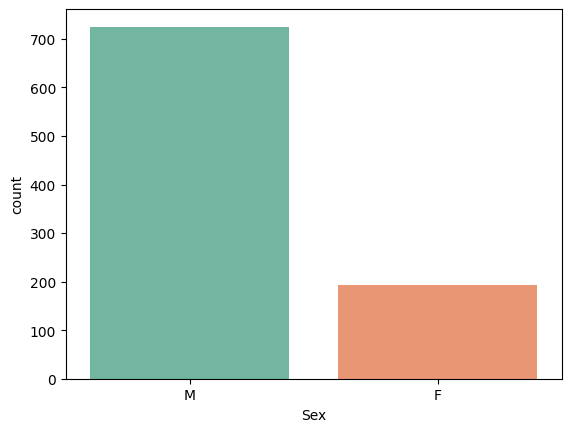

In [11]:
sns.countplot(x='Sex', data=df, palette='Set2')

In [12]:
corr_matrix = df.corr()

# Print the entire correlation matrix
print(corr_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


<Axes: xlabel='Age', ylabel='MaxHR'>

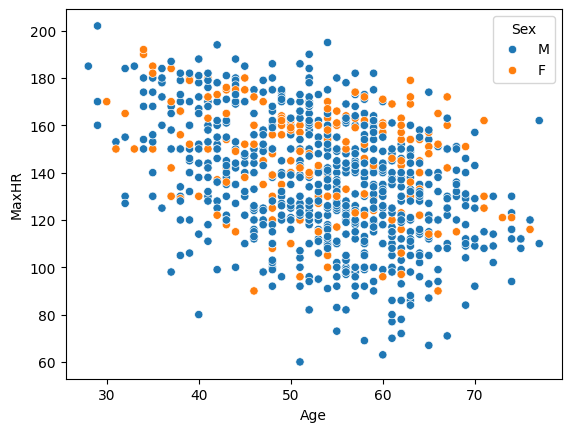

In [13]:
sns.scatterplot(x=df['Age'],y=df['MaxHR'], hue=df['Sex'])

In [14]:
num_data=[]
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
    num_data.append(i)
  else:
    None
num_data

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

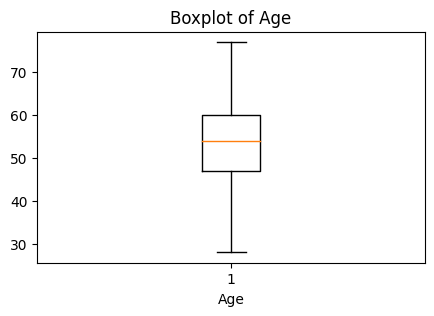

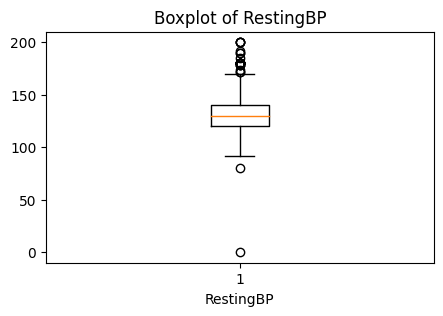

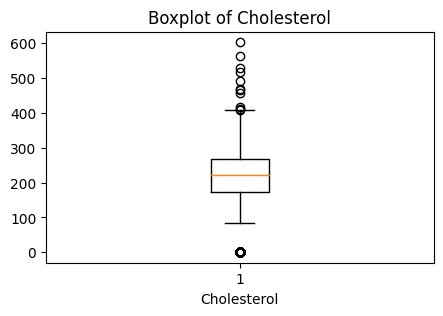

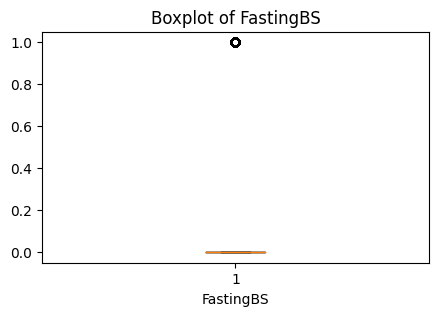

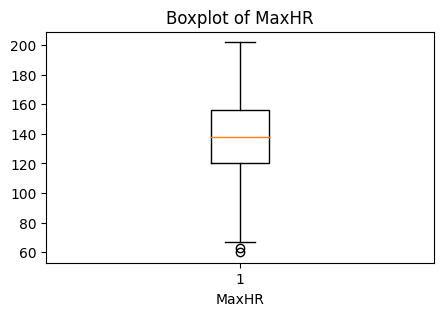

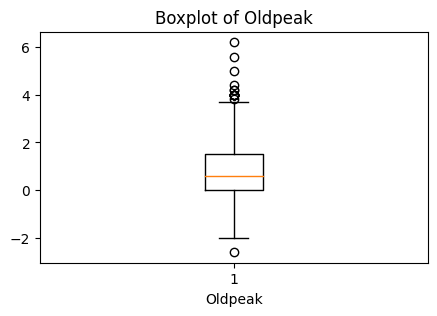

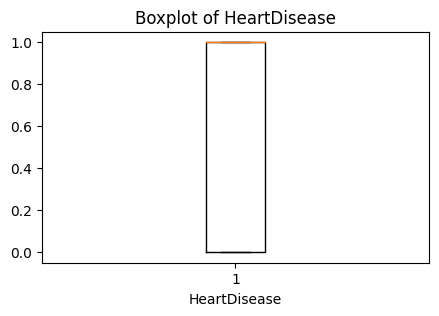

In [15]:
for col in num_data:
    plt.figure(figsize=(5, 3))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

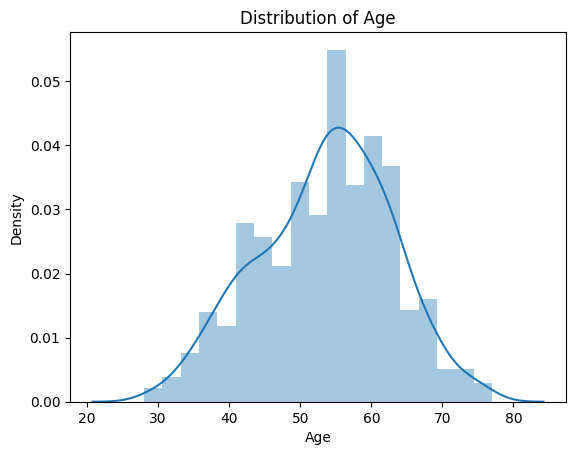

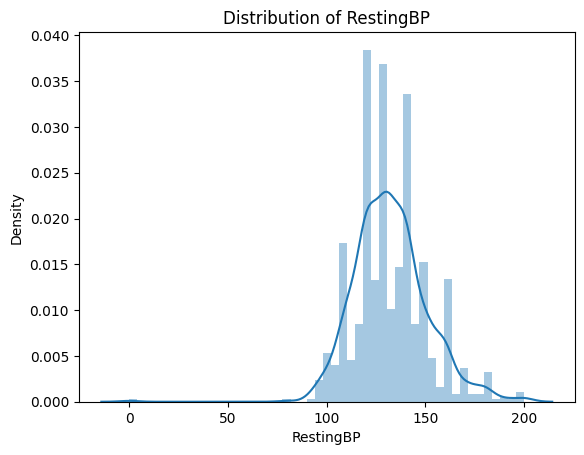

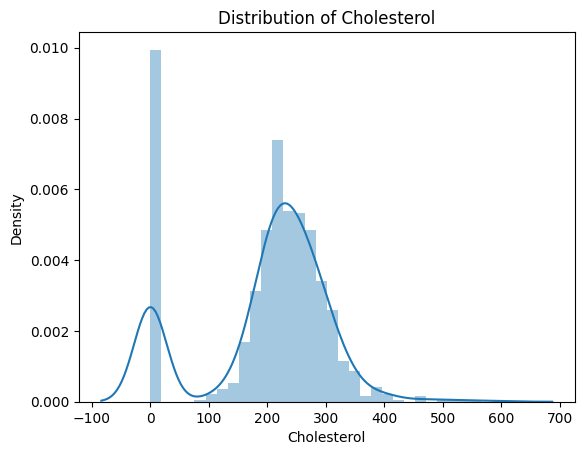

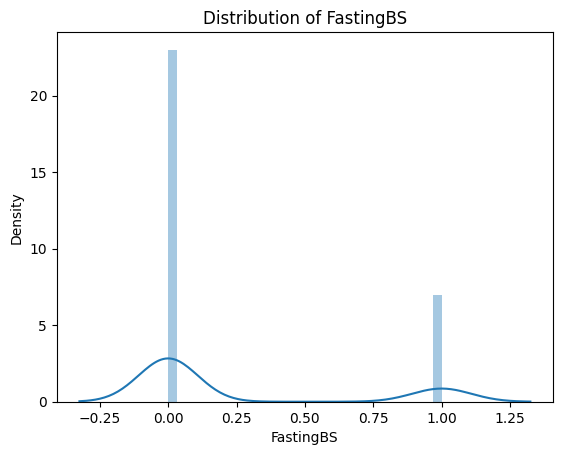

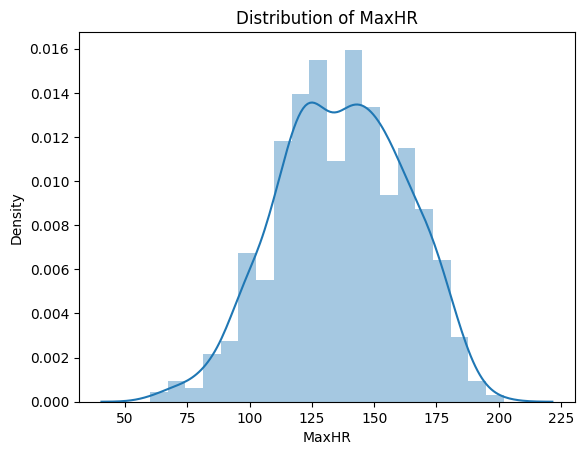

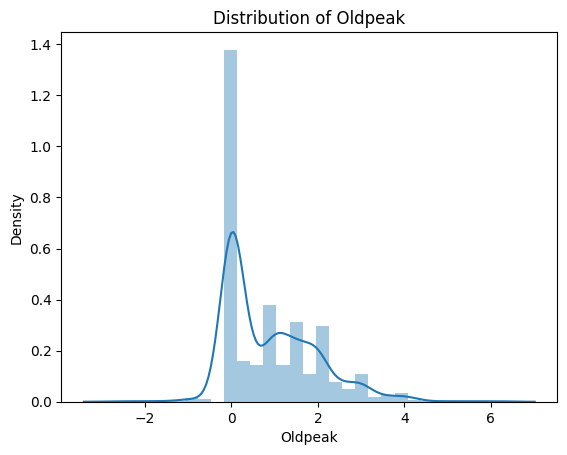

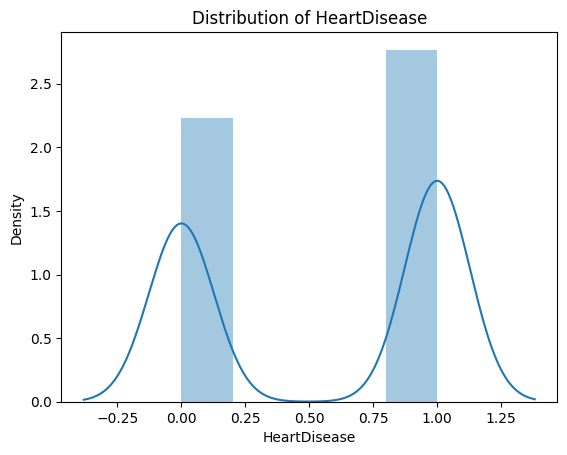

In [16]:
for col in num_data:
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

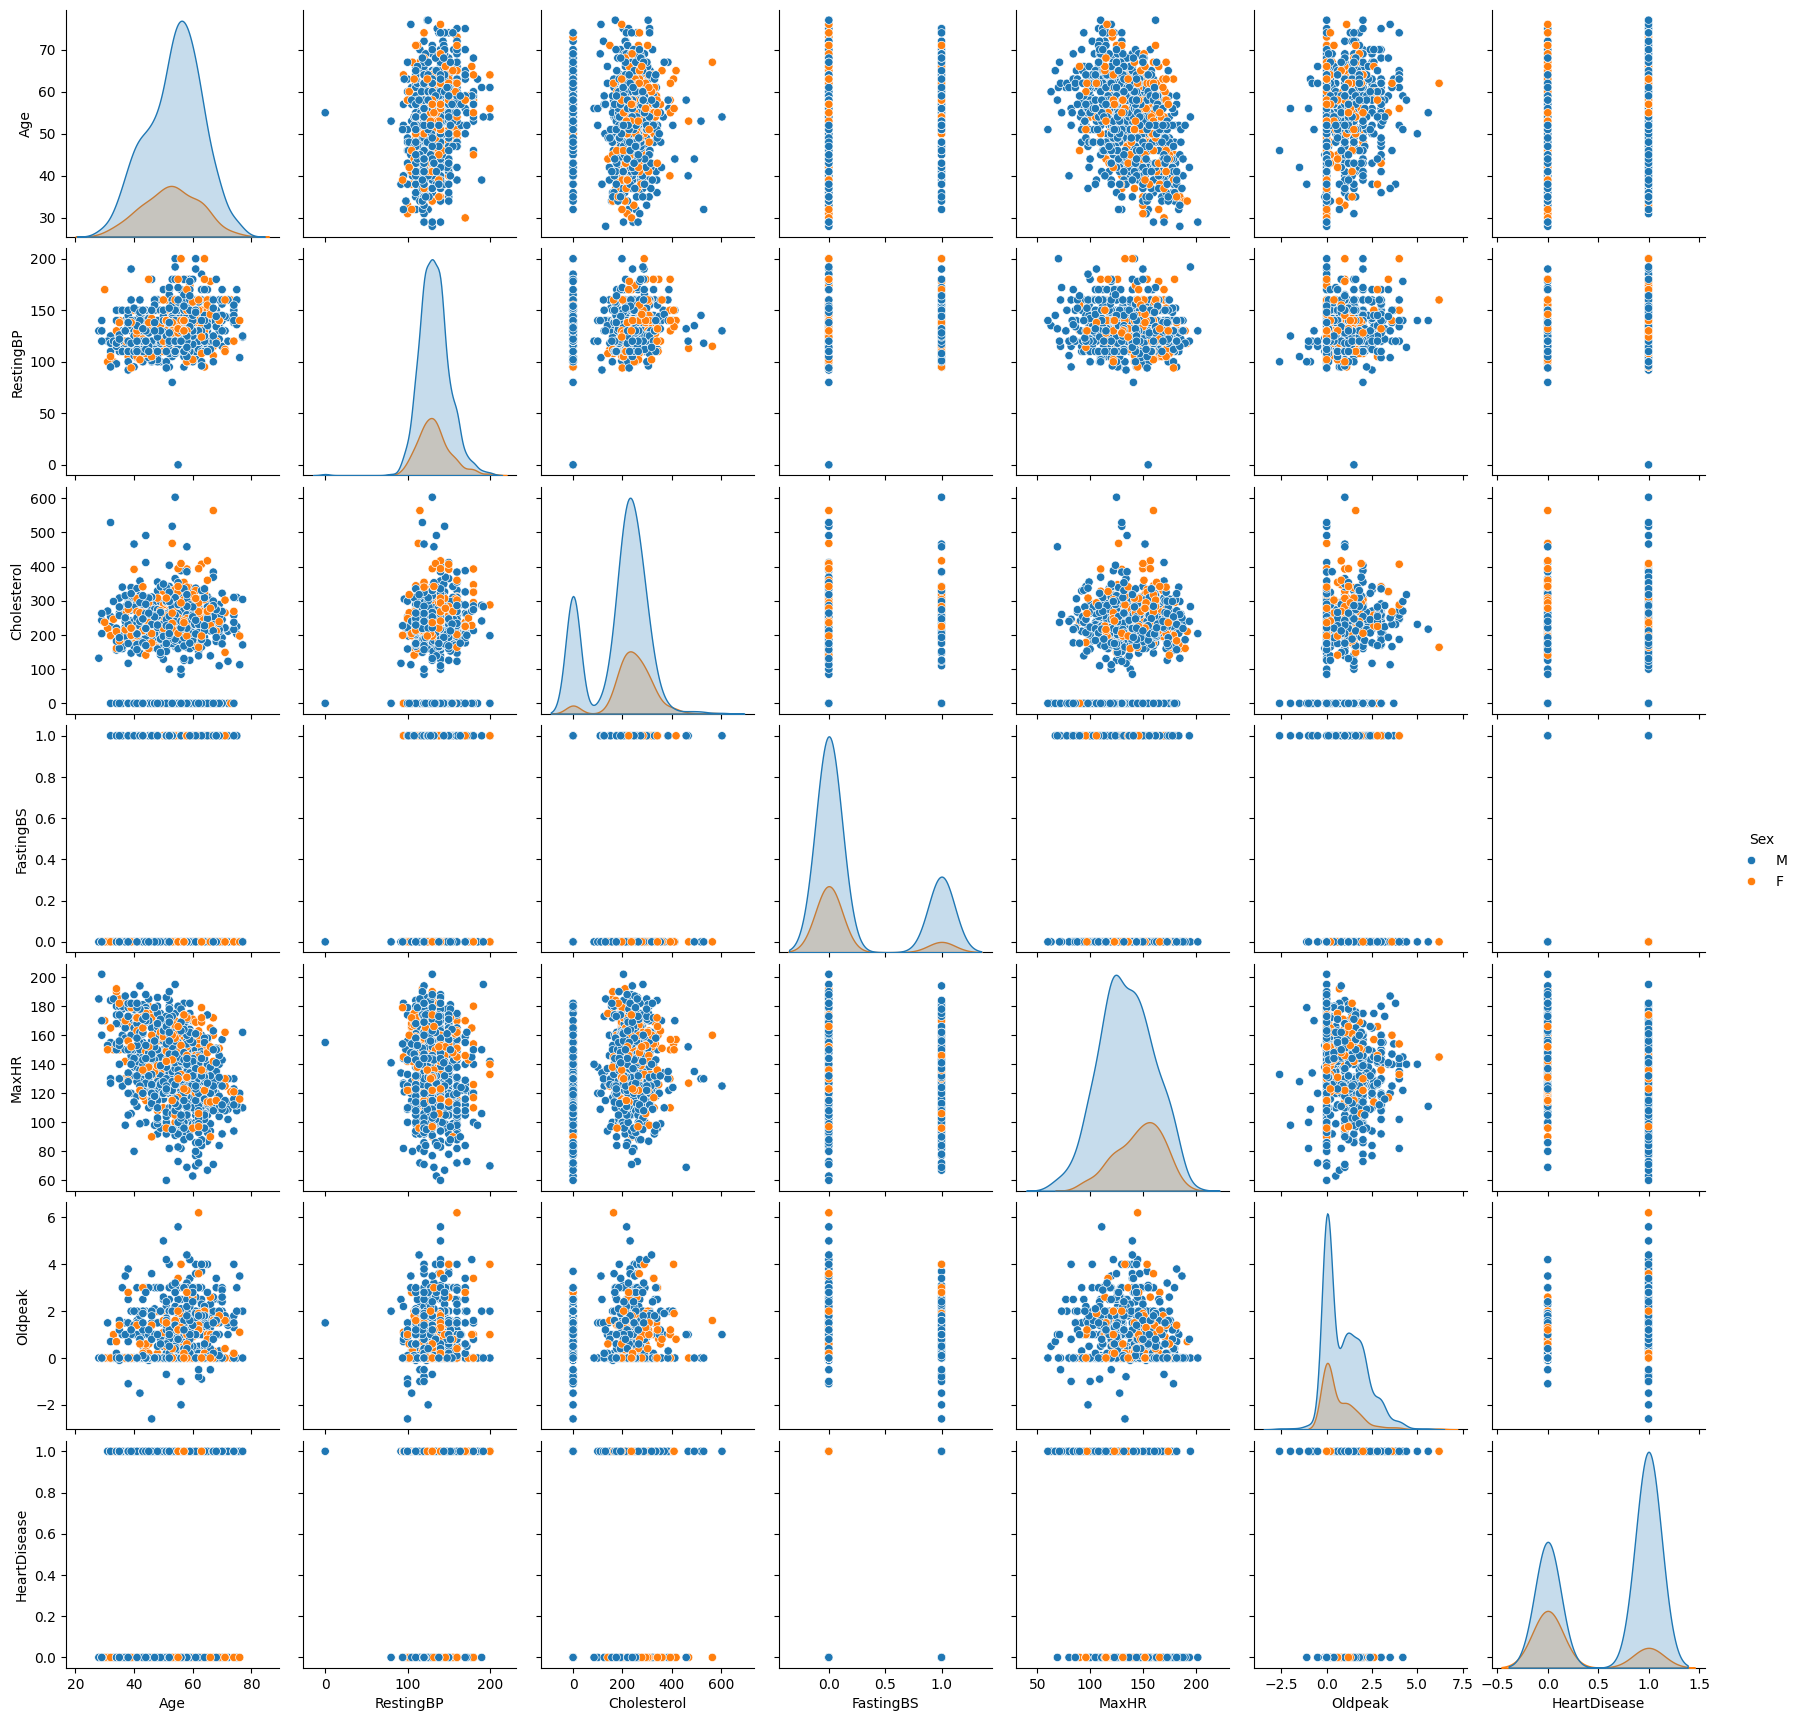

In [17]:
sns.pairplot(df, hue='Sex')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [21]:
ct = ColumnTransformer([
    ('nom', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,2,8]),
    ('ecg', OrdinalEncoder(categories = [['Normal', 'LVH', 'ST']]),['RestingECG']),
    ('slope', OrdinalEncoder(categories = [["Down",'Flat','Up']]),['ST_Slope'])
],remainder='passthrough')

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [24]:
pipe = make_pipeline(ct,rf)

In [25]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 8]),
                                                 ('ecg',
                                                  OrdinalEncoder(categories=[['Normal',
                                                                              'LVH',
                                                                              'ST']]),
                                                  ['RestingECG']),
                                                 ('slope',
                                                  OrdinalEncoder(categories=[['Down',
                                                                              'Flat',
                                                                              'Up']]),
                                                  ['ST_Slope'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [26]:
pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('nom',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 2, 8]),
                                 ('ecg',
                                  OrdinalEncoder(categories=[['Normal', 'LVH',
                                                              'ST']]),
                                  ['RestingECG']),
                                 ('slope',
                                  OrdinalEncoder(categories=[['Down', 'Flat',
                                                              'Up']]),
                                  ['ST_Slope'])]),
 'randomforestclassifier': RandomForestClassifier()}

In [27]:
y_pred = pipe.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8858695652173914

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(conf_matrix)
print(class_report)

[[67 10]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [30]:
accuracy = []
for i in range(1,10):
  rf = RandomForestClassifier(n_estimators=i,max_depth = i)
  pipe = make_pipeline(ct,rf)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  score = accuracy_score(y_test,y_pred)
  accuracy.append(score)

In [31]:
accuracy

[0.7119565217391305,
 0.717391304347826,
 0.7880434782608695,
 0.8315217391304348,
 0.8369565217391305,
 0.8695652173913043,
 0.8369565217391305,
 0.8695652173913043,
 0.8586956521739131]

Text(0, 0.5, 'score')

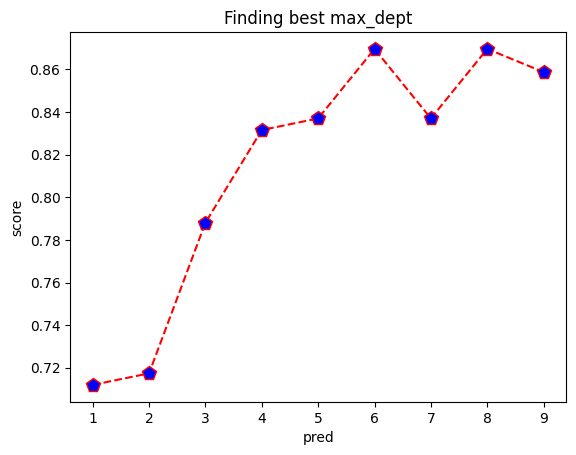

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1,10), accuracy, color='r', linestyle='dashed', marker='p',
         markerfacecolor='b', markersize=10)
plt.title('Finding best max_dept')
plt.xlabel('pred')
plt.ylabel('score')

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, x_train, y_train, cv=9, scoring='accuracy')
scores

array([0.86585366, 0.86585366, 0.87804878, 0.86585366, 0.80487805,
       0.85185185, 0.79012346, 0.88888889, 0.77777778])

In [34]:
# import pickle
# filename = 'hd_trained_model1.sav'
# pickle.dump(pipe, open(filename, 'wb'))

input_data=(40,'M','ATA',140,289,0,'Normal',172,'N',0,'Up')
input_data_as_dataframe = pd.DataFrame([input_data],columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
prediction=pipe.predict(input_data_as_dataframe)
print(prediction)

if (prediction[0]==1):
  print("The patient has the heart disease")
else:
  print("The patient do not have heart disease")

[0]
The patient do not have heart disease
